In [1]:
# Importing Libraries 

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

The biking sharing company wants to understand the factors affecting the demand of the shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands

In [2]:
#Importing the dataset 

bikedf=pd.read_csv("day.csv")

In [3]:
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Looking at the df (datatypes, null value counts ,etc)

bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values.

Most of the features have the correct data type except date

In [5]:
# Looking at the numeric values

bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Dropping instant as it is just an index

bikedf.drop("instant",axis=1,inplace=True)

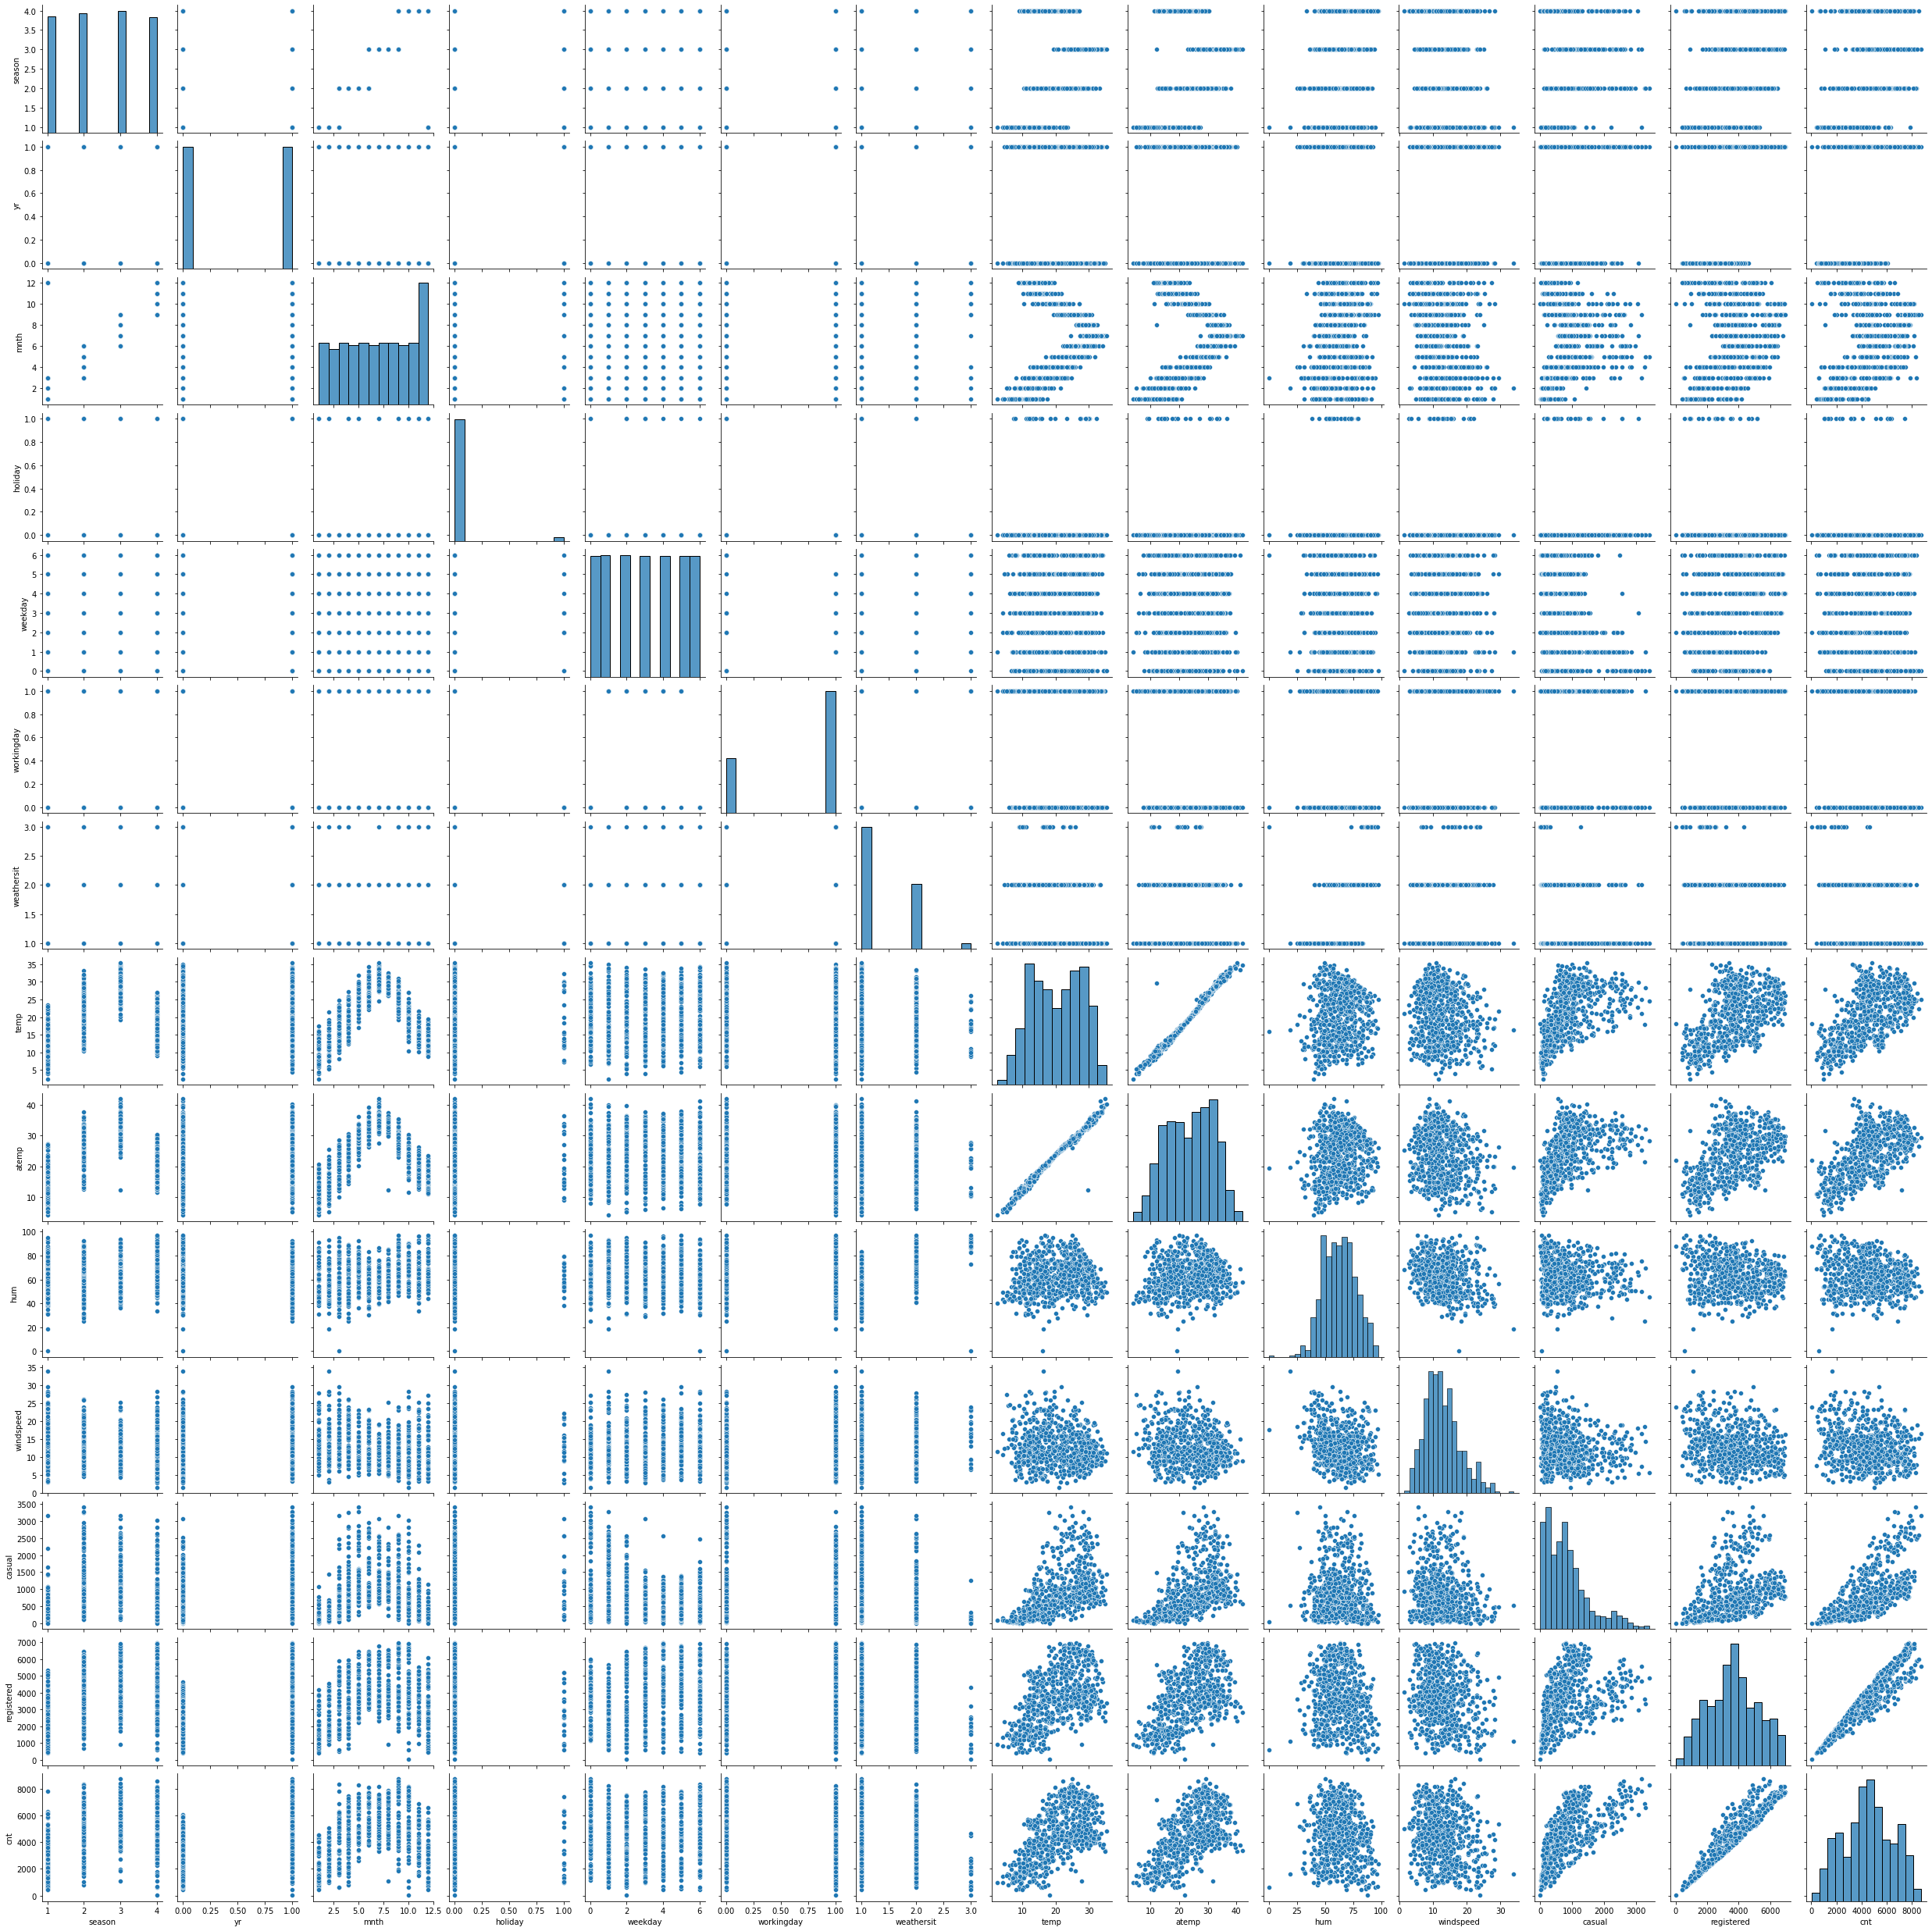

In [7]:
# Pairplots

sns.pairplot(bikedf)
plt.show()

1.As cnt is our target variable , we can see that there is some linear relationship between the target variable and some predictor variables. Hence we can use Linear Regression here. 

2.We can also see that some of the predictor variables are correlated which can lead to multicollinearity

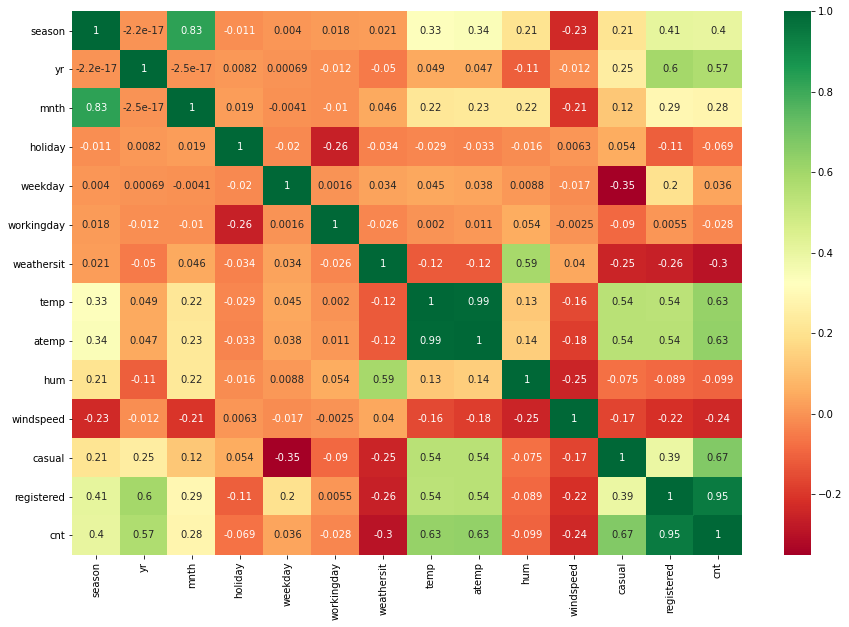

In [8]:
# Visualizing the data

plt.figure(figsize=[15,10])

sns.heatmap(bikedf.corr(), cmap="RdYlGn",annot=True)
plt.show()

cnt is our target variable(dependent variable)

1.From the heatmap it is clear that many predictor variables are correlated.

2.month-season ,temp-atemp, etc are some of the predictor variables that are correlated. 

3.working day and holiday is negatively correlated as they are opposite of each other

# Visualising Categorical Variables:

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [9]:
# We have season and weathersit as numeric variables. Lets map them to strings for ease of understanding

def func(x):
    if x==1:
        return 'spring' 
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'
    
bikedf.season=bikedf.season.apply(func)

In [10]:
#Similarly for weathersit

def weathersi(x):
    if x==1:
        return 'Clear, Few clouds,\n Partly cloudy, Partly cloudy' 
    elif x==2:
        return 'Mist + Cloudy, Mist + Broken clouds,\n Mist + Few clouds, Mist'
    elif x==3:
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds,\n Light Rain + Scattered clouds'
    elif x==4:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist,\n Snow + Fog'    
    
bikedf.weathersit=bikedf.weathersit.apply(weathersi)

In [11]:
#Converting the weekday and month to appropriate string values
# Taking the weekdays as follows:
def days(x):
    if x==1:
        return 'Mon'
    elif x==2:
        return 'Tue'
    elif x==3:
        return 'Wed'
    elif x==4:
        return 'Thurs'
    elif x==5:
        return 'Fri'
    elif x==6:
        return 'Sat'
    elif x==0:
        return 'Sun'

bikedf.weekday=bikedf.weekday.apply(days)

In [12]:
def months(x):
    if x==1:
        return 'Jan'
    elif x==2:
        return 'Feb'
    elif x==3:
        return 'Mar'
    elif x==4:
        return 'Apr'
    elif x==5:
        return 'May'
    elif x==6:
        return 'Jun'
    elif x==7:
        return 'Jul'
    elif x==8:
        return 'Aug'
    elif x==9:
        return 'Sep'
    elif x==10:
        return 'Oct'
    elif x==11:
        return 'Nov'
    elif x==12:
        return 'Dec'

bikedf.mnth=bikedf.mnth.apply(months)

In [13]:
bikedf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,1,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tue,1,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,"Clear, Few clouds,\n Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thurs,1,"Clear, Few clouds,\n Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,"Clear, Few clouds,\n Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
bikedf.shape

(730, 15)

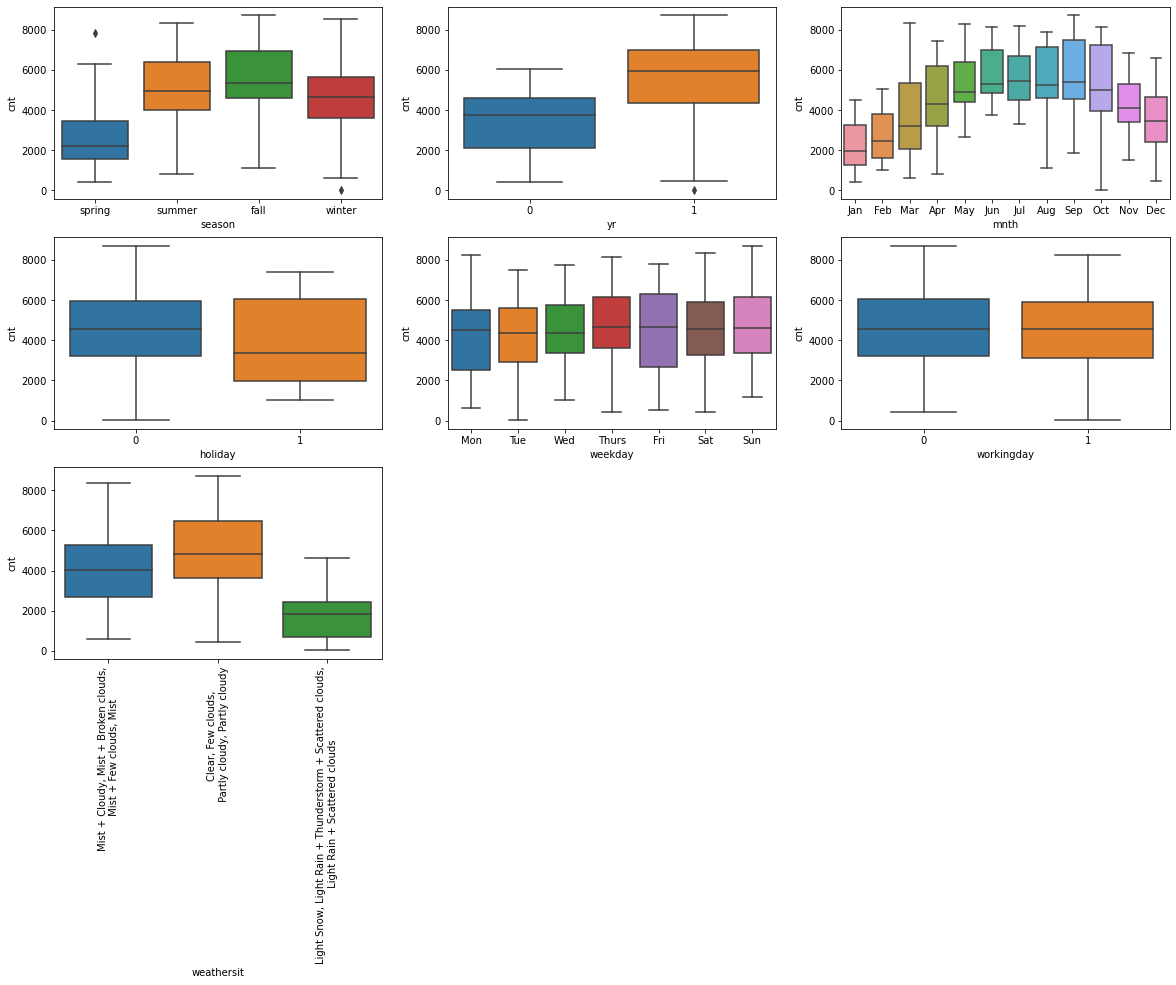

In [15]:
# Boxplots

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikedf)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikedf)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedf)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedf)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedf)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedf)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedf)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

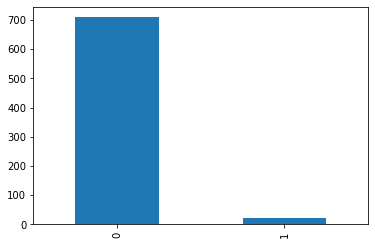

In [16]:
bikedf.holiday.value_counts().plot.bar()

<AxesSubplot:xlabel='season', ylabel='cnt'>

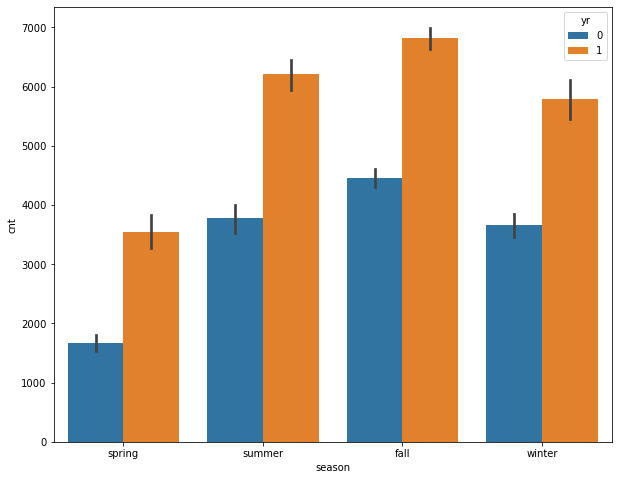

In [17]:
plt.figure(figsize=(10, 8))
sns.barplot(x='season', y = 'cnt', hue='yr', data = bikedf)


It is clear from the boxplots that:

1.The cnt increased in summer and made its peak in fall and then decreased.

2.If we look at the months they explain the same story as the seasons.

3.The cnt increased in 2019.

4.People used the service mostly when the weather sitution is Clear, Few clouds, Partly cloudy, Partly cloudy.

5.There is no data related to Heavy Snow.

6.All the days have medians in the same range for the weekday.

7.Majority of bookings are on working days

In [18]:
#Converting the date into the correct dtype

bikedf.dteday=pd.to_datetime(bikedf.dteday)
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ 

In [19]:
# We already have the month and yr columns , so we can drop date

bikedf.drop("dteday",axis=1,inplace=True)

In [20]:
#We will use dummy variables for weathersit,season,weekday and month

weather=pd.get_dummies(bikedf.weathersit, drop_first=True)
seasons=pd.get_dummies(bikedf.season, drop_first=True)
months=pd.get_dummies(bikedf.mnth, drop_first=True)
weekdays=pd.get_dummies(bikedf.weekday, drop_first=True)


In [21]:
#Concatenating the new dataframes

bikedf1=pd.concat([bikedf,weather,seasons,months,weekdays],axis=1)

In [22]:
#Dropping the columns for which we got dummy variables

bikedf1.drop(["season","weathersit",'mnth','weekday'],axis=1,inplace=True)

In [23]:
bikedf1.shape

(730, 32)

In [24]:
bikedf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   yr                                                                                        730 non-null    int64  
 1   holiday                                                                                   730 non-null    int64  
 2   workingday                                                                                730 non-null    int64  
 3   temp                                                                                      730 non-null    float64
 4   atemp                                                                                     730 non-null    float64
 5   hum                                                      

In [25]:
# Dropping the casual and registered columns as casual+registered = cnt

bikedf1.drop(['casual','registered'],axis=1,inplace=True)

In [26]:
bikedf1.shape

(730, 30)

# Splitting the Data into Training and Testing Sets

Performing a train-test split

In [27]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bikedf1, train_size = 0.7, random_state = 100)

In [28]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [29]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds,\n Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds,\n Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,4485.337255,0.029412,0.345098,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,1950.666077,0.169124,0.475867,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# We will scale some features so that it will be easy for interpretation going forward.

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
num_vars=['temp','atemp','hum','windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds,\n Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds,\n Mist + Few clouds, Mist",...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.029412,0.345098,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.169124,0.475867,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the values are in the range 0 to 1

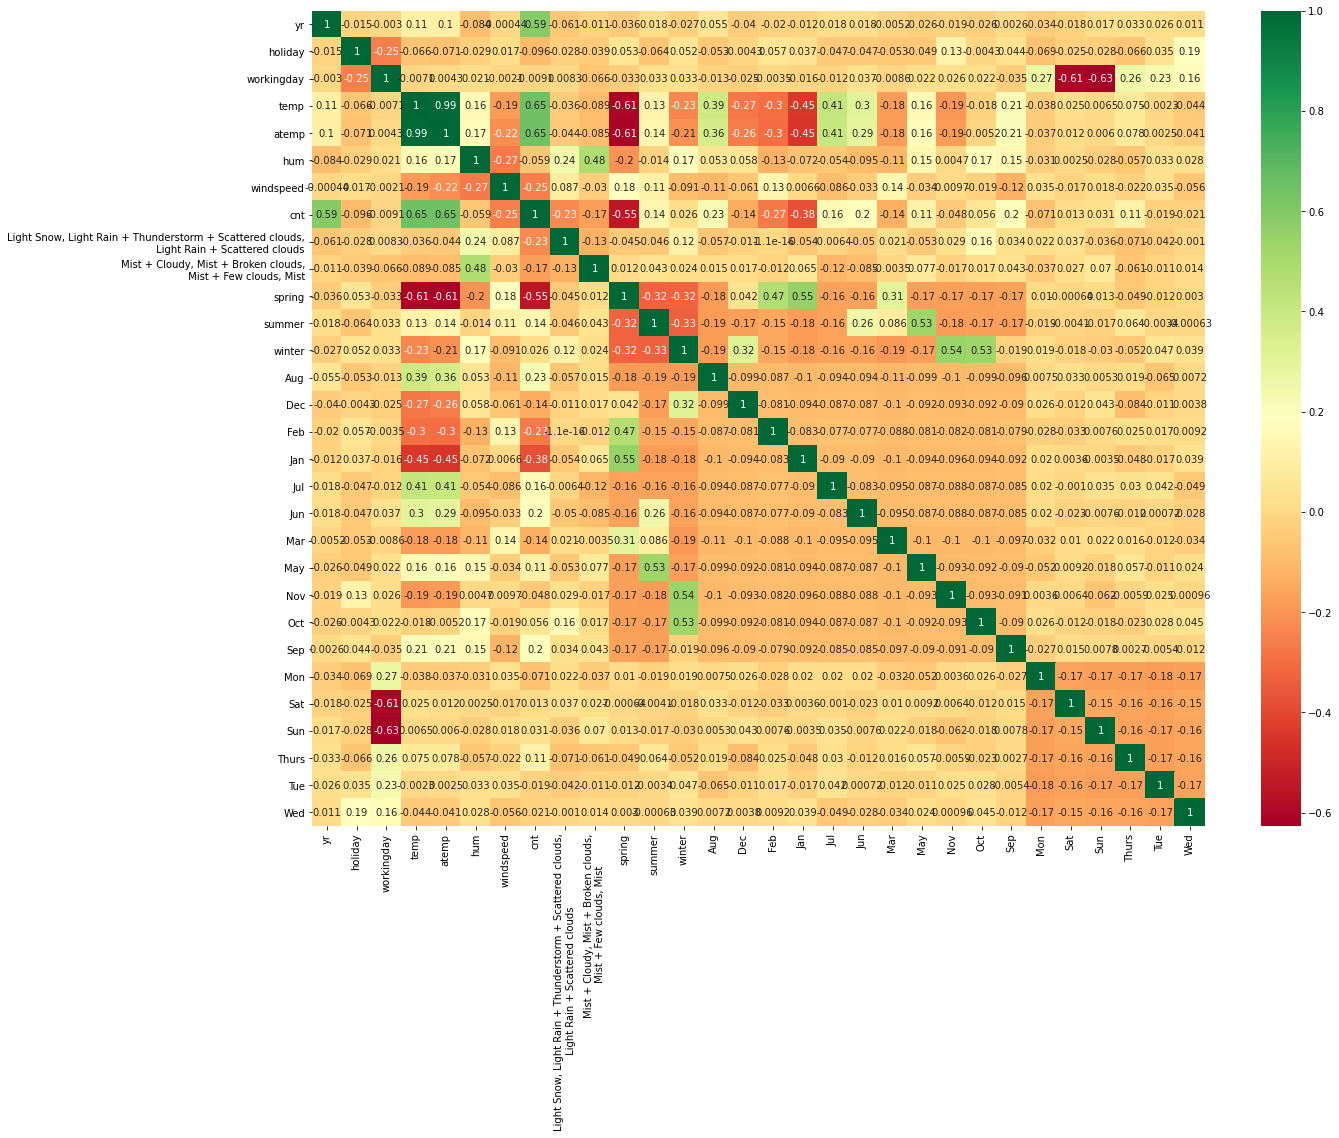

In [32]:
#Checking for correlation again

plt.figure(figsize = (20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

1.temp-atemp are highly correlated.

2.Spring and cnt are negatively correlated.

3.sat-sun are negatively correlated with working day.

4.Season and corresponding months are correlated.

5.The target variable cnt and predictor variables temp,atemp are correlated.

6.cnt and year are correlated as the demand increased.

# Model building

In [33]:
y_train=df_train.pop("cnt")
X_train=df_train

In [34]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [35]:
# We will use Recursive feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow, Light Rain + Thunderstorm + Scattered clouds,\n Light Rain + Scattered clouds',
  True,
  1),
 ('Mist + Cloudy, Mist + Broken clouds,\n Mist + Few clouds, Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 7),
 ('Mar', False, 10),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thurs', False, 9),
 ('Tue', False, 2),
 ('Wed', False, 6)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds,\n Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds,\n Mist + Few clouds, Mist',
       'spring', 'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep',
       'Sat', 'Sun'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Thurs', 'Tue', 'Wed'], dtype='object')

# Building model using statsmodel, for the detailed statistics


In [39]:
X_train_rfe=X_train[col]

In [40]:
# Model 1
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [41]:
lm1=sm.OLS(y_train,X_train_rfe1).fit()

In [42]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          6.82e-185
Time:                        22:37:25   Log-Likelihood:                 518.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     489   BIC:                            -905.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.3790      0.081      4.688      0.000       0.220       0.538
yr                                                                                           0.2305      0.008     28.490      0.000       0.215       0.246
holiday                                                                                     -0.1328      0.066     -2.026      0.043      -0.262      -0.004
workingday                                                                                  -0.0541      0.071     -0.763      0.446      -0.193       0.085
temp                                                                                         0.4320      0.136      3.182      0.002       0.165       0.699
atemp                                                                                        0.0331      0.138      0.241      0.810      -0.237       0.304
hum                                                                                         -0.1551      0.038     -4.092      0.000      -0.230      -0.081
windspeed                                                                                   -0.1878      0.026     -7.148      0.000      -0.239      -0.136
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2496      0.026     -9.430      0.000      -0.302      -0.198
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0571      0.011     -5.442      0.000      -0.078      -0.037
spring                                                                                      -0.0531      0.022     -2.385      0.017      -0.097      -0.009
summer                                                                                       0.0387      0.016      2.455      0.014       0.008       0.070
winter                                                                                       0.0998      0.018      5.449      0.000       0.064       0.136
Dec                                                                                         -0.0464      0.018     -2.525      0.012      -0.082      -0.010
Feb                                                                                         -0.0350      0.022     -1.616      0.107      -0.078       0.008
Jan                                                                                         -0.0622      0.022     -2.893      0.004      -0.104      -0.020
Jul                                                                                         -0.0550 

In [43]:
# Calculating VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,394.44
4,atemp,372.02
2,workingday,47.38
5,hum,38.28
19,Sun,9.52
18,Sat,9.18
9,spring,7.15
6,windspeed,5.67
11,winter,5.06
10,summer,3.69


We will remove the variables in following order:

1.High pvalue and high vif

2.High pvalue and low vif

3.High VIF and low p value

In [44]:
# Model 2
# Lets drop atemp as it has high pvalue and high VIF

X_train_rfe2=X_train_rfe.drop("atemp",axis=1)
X_train_rfe_2m = sm.add_constant(X_train_rfe2)
lm2=sm.OLS(y_train,X_train_rfe_2m).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     143.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          5.79e-186
Time:                        22:37:25   Log-Likelihood:                 518.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     490   BIC:                            -911.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.3787      0.081      4.689      0.000       0.220       0.537
yr                                                                                           0.2305      0.008     28.517      0.000       0.215       0.246
holiday                                                                                     -0.1330      0.065     -2.031      0.043      -0.262      -0.004
workingday                                                                                  -0.0540      0.071     -0.762      0.446      -0.193       0.085
temp                                                                                         0.4633      0.038     12.138      0.000       0.388       0.538
hum                                                                                         -0.1547      0.038     -4.090      0.000      -0.229      -0.080
windspeed                                                                                   -0.1891      0.026     -7.346      0.000      -0.240      -0.138
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2500      0.026     -9.475      0.000      -0.302      -0.198
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0572      0.010     -5.453      0.000      -0.078      -0.037
spring                                                                                      -0.0523      0.022     -2.377      0.018      -0.096      -0.009
summer                                                                                       0.0394      0.015      2.558      0.011       0.009       0.070
winter                                                                                       0.1006      0.018      5.594      0.000       0.065       0.136
Dec                                                                                         -0.0463      0.018     -2.525      0.012      -0.082      -0.010
Feb                                                                                         -0.0351      0.022     -1.620      0.106      -0.078       0.007
Jan                                                                                         -0.0624      0.021     -2.904      0.004      -0.105      -0.020
Jul                                                                                         -0.0547      0.018     -3.009      0.003      -0.090      -0.019
Nov                                                                                         -0.0414 

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,47.36
4,hum,38.22
3,temp,28.58
18,Sun,9.52
17,Sat,9.15
8,spring,7.01
5,windspeed,5.44
10,winter,4.89
9,summer,3.54
13,Jan,2.54


In [46]:
#Model 3
#Lets drop 'workingday' as it has high p value and high VIF

X_train_rfe3=X_train_rfe2.drop("workingday",axis=1)
X_train_rfe_3m = sm.add_constant(X_train_rfe3)
lm3=sm.OLS(y_train,X_train_rfe_3m).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          6.19e-187
Time:                        22:37:25   Log-Likelihood:                 517.74
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     491   BIC:                            -917.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.3239      0.037      8.800      0.000       0.252       0.396
yr                                                                                           0.2309      0.008     28.638      0.000       0.215       0.247
holiday                                                                                     -0.0870      0.026     -3.404      0.001      -0.137      -0.037
temp                                                                                         0.4639      0.038     12.159      0.000       0.389       0.539
hum                                                                                         -0.1538      0.038     -4.070      0.000      -0.228      -0.080
windspeed                                                                                   -0.1896      0.026     -7.371      0.000      -0.240      -0.139
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2498      0.026     -9.473      0.000      -0.302      -0.198
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0571      0.010     -5.443      0.000      -0.078      -0.036
spring                                                                                      -0.0519      0.022     -2.359      0.019      -0.095      -0.009
summer                                                                                       0.0396      0.015      2.568      0.011       0.009       0.070
winter                                                                                       0.1006      0.018      5.597      0.000       0.065       0.136
Dec                                                                                         -0.0460      0.018     -2.511      0.012      -0.082      -0.010
Feb                                                                                         -0.0347      0.022     -1.605      0.109      -0.077       0.008
Jan                                                                                         -0.0621      0.021     -2.895      0.004      -0.104      -0.020
Jul                                                                                         -0.0547      0.018     -3.011      0.003      -0.090      -0.019
Nov                                                                                         -0.0429      0.019     -2.262      0.024      -0.080      -0.006
Sep                                                                                          0.0735 

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.58
2,temp,18.60
7,spring,5.48
4,windspeed,4.74
9,winter,4.07
8,summer,2.83
12,Jan,2.38
6,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",2.35
0,yr,2.09
11,Feb,1.92


In [48]:
#Model 4
#Lets drop Sat as it has high p value and low vif

X_train_rfe4=X_train_rfe3.drop("Sat",axis=1)
X_train_rfe_4m = sm.add_constant(X_train_rfe4)
lm4=sm.OLS(y_train,X_train_rfe_4m).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.06e-187
Time:                        22:37:25   Log-Likelihood:                 516.92
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     492   BIC:                            -921.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.3268      0.037      8.890      0.000       0.255       0.399
yr                                                                                           0.2306      0.008     28.599      0.000       0.215       0.246
holiday                                                                                     -0.0879      0.026     -3.437      0.001      -0.138      -0.038
temp                                                                                         0.4657      0.038     12.209      0.000       0.391       0.541
hum                                                                                         -0.1565      0.038     -4.145      0.000      -0.231      -0.082
windspeed                                                                                   -0.1904      0.026     -7.402      0.000      -0.241      -0.140
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2478      0.026     -9.408      0.000      -0.300      -0.196
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0561      0.010     -5.365      0.000      -0.077      -0.036
spring                                                                                      -0.0511      0.022     -2.323      0.021      -0.094      -0.008
summer                                                                                       0.0396      0.015      2.568      0.011       0.009       0.070
winter                                                                                       0.1005      0.018      5.586      0.000       0.065       0.136
Dec                                                                                         -0.0457      0.018     -2.491      0.013      -0.082      -0.010
Feb                                                                                         -0.0355      0.022     -1.642      0.101      -0.078       0.007
Jan                                                                                         -0.0622      0.021     -2.896      0.004      -0.104      -0.020
Jul                                                                                         -0.0550      0.018     -3.025      0.003      -0.091      -0.019
Nov                                                                                         -0.0424      0.019     -2.231      0.026      -0.080      -0.005
Sep                                                                                          0.0737 

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.55
2,temp,18.41
7,spring,5.45
4,windspeed,4.74
9,winter,4.07
8,summer,2.82
12,Jan,2.38
6,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",2.34
0,yr,2.09
11,Feb,1.92


In [50]:
#Model 5 
#Lets drop Sun

X_train_rfe5=X_train_rfe4.drop("Sun",axis=1)
X_train_rfe_5m= sm.add_constant(X_train_rfe5)
lm5=sm.OLS(y_train,X_train_rfe_5m).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          2.94e-188
Time:                        22:37:25   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.3313      0.037      9.023      0.000       0.259       0.403
yr                                                                                           0.2308      0.008     28.570      0.000       0.215       0.247
holiday                                                                                     -0.0887      0.026     -3.462      0.001      -0.139      -0.038
temp                                                                                         0.4657      0.038     12.188      0.000       0.391       0.541
hum                                                                                         -0.1602      0.038     -4.242      0.000      -0.234      -0.086
windspeed                                                                                   -0.1899      0.026     -7.371      0.000      -0.241      -0.139
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2479      0.026     -9.395      0.000      -0.300      -0.196
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0546      0.010     -5.231      0.000      -0.075      -0.034
spring                                                                                      -0.0515      0.022     -2.336      0.020      -0.095      -0.008
summer                                                                                       0.0391      0.015      2.530      0.012       0.009       0.069
winter                                                                                       0.1002      0.018      5.560      0.000       0.065       0.136
Dec                                                                                         -0.0446      0.018     -2.431      0.015      -0.081      -0.009
Feb                                                                                         -0.0355      0.022     -1.636      0.102      -0.078       0.007
Jan                                                                                         -0.0624      0.022     -2.901      0.004      -0.105      -0.020
Jul                                                                                         -0.0543      0.018     -2.980      0.003      -0.090      -0.018
Nov                                                                                         -0.0435      0.019     -2.289      0.023      -0.081      -0.006
Sep                                                                                          0.0740 

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.52
2,temp,18.33
7,spring,5.45
4,windspeed,4.73
9,winter,4.07
8,summer,2.82
12,Jan,2.38
6,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",2.33
0,yr,2.09
11,Feb,1.92


In [52]:
#Model 6 
#Dropping Feb

X_train_rfe6=X_train_rfe5.drop("Feb",axis=1)
X_train_rfe_6m= sm.add_constant(X_train_rfe6)
lm6=sm.OLS(y_train,X_train_rfe_6m).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        22:37:25   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.3197      0.036      8.859      0.000       0.249       0.391
yr                                                                                           0.2304      0.008     28.487      0.000       0.215       0.246
holiday                                                                                     -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                                                                                         0.4815      0.037     13.005      0.000       0.409       0.554
hum                                                                                         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                                                                                   -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring                                                                                      -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                                                                                       0.0423      0.015      2.761      0.006       0.012       0.072
winter                                                                                       0.1019      0.018      5.656      0.000       0.067       0.137
Dec                                                                                         -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan                                                                                         -0.0434      0.018     -2.393      0.017      -0.079      -0.008
Jul                                                                                         -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov                                                                                         -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep                                                                                          0.0755      0.017      4.466      0.000       0.042       0.109
==============================================================================
Omnibus:             

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",2.32
0,yr,2.09
13,Nov,1.85
11,Jan,1.75


In [54]:
#Model 7 
#Dropping hum

X_train_rfe7=X_train_rfe6.drop("hum",axis=1)
X_train_rfe_7m= sm.add_constant(X_train_rfe7)
lm7=sm.OLS(y_train,X_train_rfe_7m).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          4.75e-186
Time:                        22:37:25   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.2450      0.032      7.618      0.000       0.182       0.308
yr                                                                                           0.2345      0.008     28.687      0.000       0.218       0.251
holiday                                                                                     -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                                                                                         0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                                                                                   -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring                                                                                      -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer                                                                                       0.0349      0.015      2.251      0.025       0.004       0.065
winter                                                                                       0.0869      0.018      4.831      0.000       0.052       0.122
Dec                                                                                         -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan                                                                                         -0.0500      0.018     -2.719      0.007      -0.086      -0.014
Jul                                                                                         -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov                                                                                         -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep                                                                                          0.0687      0.017      4.015      0.000       0.035       0.102
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:               

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
8,winter,2.95
6,spring,2.89
7,summer,2.24
0,yr,2.07
12,Nov,1.81
10,Jan,1.66
11,Jul,1.59
5,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",1.57


In [56]:
#Model 8
#Dropping Nov as it has high p value

X_train_rfe8=X_train_rfe7.drop("Nov",axis=1)
X_train_rfe_8m= sm.add_constant(X_train_rfe8)
lm8=sm.OLS(y_train,X_train_rfe_8m).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          2.74e-186
Time:                        22:37:25   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.2283      0.031      7.310      0.000       0.167       0.290
yr                                                                                           0.2343      0.008     28.573      0.000       0.218       0.250
holiday                                                                                     -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp                                                                                         0.4581      0.035     13.031      0.000       0.389       0.527
windspeed                                                                                   -0.1594      0.025     -6.291      0.000      -0.209      -0.110
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0793      0.009     -9.089      0.000      -0.096      -0.062
spring                                                                                      -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer                                                                                       0.0404      0.015      2.635      0.009       0.010       0.070
winter                                                                                       0.0774      0.017      4.438      0.000       0.043       0.112
Dec                                                                                         -0.0283      0.016     -1.731      0.084      -0.060       0.004
Jan                                                                                         -0.0451      0.018     -2.467      0.014      -0.081      -0.009
Jul                                                                                         -0.0499      0.019     -2.686      0.007      -0.086      -0.013
Sep                                                                                          0.0742      0.017      4.373      0.000       0.041       0.108
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
===================

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
6,spring,2.89
7,summer,2.24
0,yr,2.07
8,winter,2.05
10,Jan,1.65
11,Jul,1.59
5,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",1.57
12,Sep,1.34


In [58]:
#Model 9
#Dropping Dec as it has high p value

X_train_rfe9=X_train_rfe8.drop("Dec",axis=1)
X_train_rfe_9m= sm.add_constant(X_train_rfe9)
lm9=sm.OLS(y_train,X_train_rfe_9m).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          8.14e-187
Time:                        22:37:26   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.2154      0.030      7.088      0.000       0.156       0.275
yr                                                                                           0.2343      0.008     28.517      0.000       0.218       0.250
holiday                                                                                     -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                                                                                         0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                                                                                   -0.1549      0.025     -6.135      0.000      -0.205      -0.105
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring                                                                                      -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer                                                                                       0.0434      0.015      2.845      0.005       0.013       0.073
winter                                                                                       0.0757      0.017      4.335      0.000       0.041       0.110
Jan                                                                                         -0.0383      0.018     -2.138      0.033      -0.073      -0.003
Jul                                                                                         -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep                                                                                          0.0764      0.017      4.506      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specifie

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
6,spring,2.75
7,summer,2.24
0,yr,2.07
8,winter,1.78
9,Jan,1.61
10,Jul,1.59
5,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",1.56
11,Sep,1.34


In [60]:
#Model 10
#Dropping Jan as it has high p value

X_train_rfe10=X_train_rfe9.drop("Jan",axis=1)
X_train_rfe_10m= sm.add_constant(X_train_rfe10)
lm10=sm.OLS(y_train,X_train_rfe_10m).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          5.06e-187
Time:                        22:37:26   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.1994      0.030      6.746      0.000       0.141       0.258
yr                                                                                           0.2336      0.008     28.352      0.000       0.217       0.250
holiday                                                                                     -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                                                                                         0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                                                                                   -0.1479      0.025     -5.887      0.000      -0.197      -0.099
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring                                                                                      -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer                                                                                       0.0465      0.015      3.051      0.002       0.017       0.076
winter                                                                                       0.0817      0.017      4.730      0.000       0.048       0.116
Jul                                                                                         -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep                                                                                          0.0768      0.017      4.517      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.23
6,spring,2.08
0,yr,2.07
8,winter,1.78
9,Jul,1.58
5,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",1.55
10,Sep,1.34
4,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08


In [62]:
#Model 11
#Dropping Jul

X_train_rfe11=X_train_rfe10.drop("Jul",axis=1)
X_train_rfe_11m= sm.add_constant(X_train_rfe11)
lm11=sm.OLS(y_train,X_train_rfe_11m).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          1.47e-186
Time:                        22:37:26   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.1909      0.030      6.447      0.000       0.133       0.249
yr                                                                                           0.2341      0.008     28.237      0.000       0.218       0.250
holiday                                                                                     -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                                                                                         0.4777      0.033     14.423      0.000       0.413       0.543
windspeed                                                                                   -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring                                                                                      -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer                                                                                       0.0621      0.014      4.350      0.000       0.034       0.090
winter                                                                                       0.0945      0.017      5.630      0.000       0.062       0.127
Sep                                                                                          0.0910      0.016      5.566      0.000       0.059       0.123
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe11.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe11.values, i) for i in range(X_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
6,spring,1.99
7,summer,1.90
8,winter,1.63
5,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",1.55
9,Sep,1.23
4,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08
1,holiday,1.04


In [64]:
#Model 12
#Dropping spring

X_train_rfe12=X_train_rfe11.drop("spring",axis=1)
X_train_rfe_12m= sm.add_constant(X_train_rfe12)
lm12=sm.OLS(y_train,X_train_rfe_12m).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          2.83e-186
Time:                        22:37:26   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                        0.1259      0.017      7.508      0.000       0.093       0.159
yr                                                                                           0.2329      0.008     27.962      0.000       0.216       0.249
holiday                                                                                     -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp                                                                                         0.5480      0.020     27.360      0.000       0.509       0.587
windspeed                                                                                   -0.1532      0.025     -6.039      0.000      -0.203      -0.103
Light Snow, Light Rain + Thunderstorm + Scattered clouds,
 Light Rain + Scattered clouds    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
Mist + Cloudy, Mist + Broken clouds,
 Mist + Few clouds, Mist                               -0.0784      0.009     -8.844      0.000      -0.096      -0.061
summer                                                                                       0.0881      0.010      8.437      0.000       0.068       0.109
winter                                                                                       0.1293      0.011     12.314      0.000       0.109       0.150
Sep                                                                                          0.1012      0.016      6.330      0.000       0.070       0.133
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe12.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe12.values, i) for i in range(X_train_rfe12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
6,summer,1.57
5,"Mist + Cloudy, Mist + Broken clouds,\n Mist + ...",1.48
7,winter,1.37
8,Sep,1.20
4,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08
1,holiday,1.04


Now, all the pvalues are less than 0.05 and are significant and the vif values are below 5

In [66]:
lm12.params

const                                                                                        0.125926
yr                                                                                           0.232861
holiday                                                                                     -0.098685
temp                                                                                         0.548008
windspeed                                                                                   -0.153246
Light Snow, Light Rain + Thunderstorm + Scattered clouds,\n Light Rain + Scattered clouds   -0.282869
Mist + Cloudy, Mist + Broken clouds,\n Mist + Few clouds, Mist                              -0.078375
summer                                                                                       0.088080
winter                                                                                       0.129345
Sep                                                                               

cnt=0.125926 + (0.232861 x yr) + (-0.098685 x holiday) + (0.548008 x temp) − (0.153246 x windspeed) + (0.088080x summer) +(0.129345 x winter) + (0.101195 x Sep) − (0.078375 x Misty/cloudy) − (0.282869 x Lightrain/snow)

# Residual Analysis


In [67]:
y_train_predict=lm12.predict(X_train_rfe_12m)

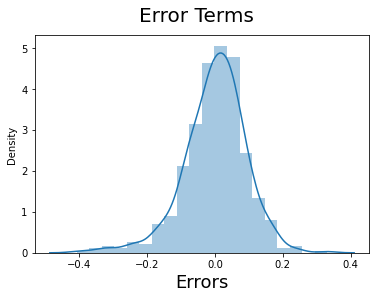

In [68]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

The error terms are normally distributed and hence our assumption is correct

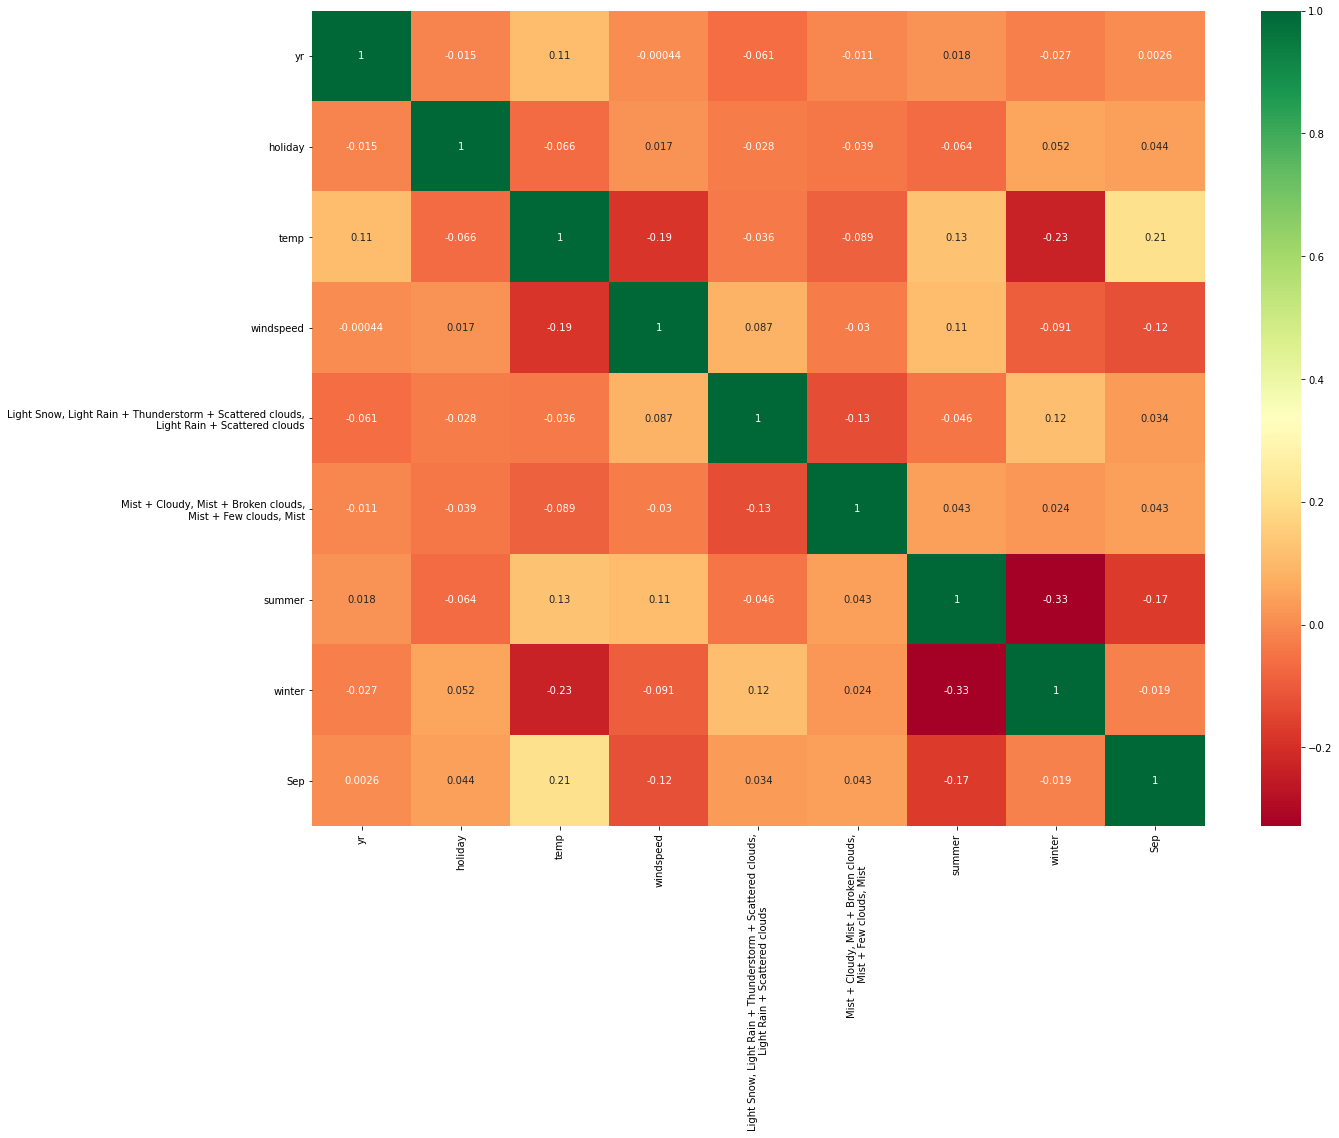

In [69]:
plt.figure(figsize=[20,15])
sns.heatmap(X_train_rfe12.corr(), annot=True , cmap="RdYlGn")
plt.show()

There is no multicollinearity between predictor variables

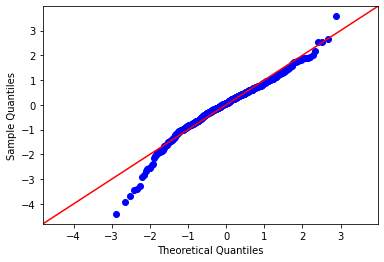

In [70]:
sm.qqplot((y_train - y_train_predict), fit=True, line='45')
plt.show()

# Making Predictions on Test set

In [71]:
#Scaling the numeric variables

num_vars=['temp','atemp','hum','windspeed','cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

In [72]:
#Dropping constant

Xtrain_ref_12_withoutconst=X_train_rfe_12m.drop("const",axis=1)

In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_test_new = X_test[Xtrain_ref_12_withoutconst.columns]

In [75]:
#Adding constant
X_test_new_sm=sm.add_constant(X_test_new)

In [76]:
y_pred = lm12.predict(X_test_new_sm)

Text(0, 0.5, 'y_pred')

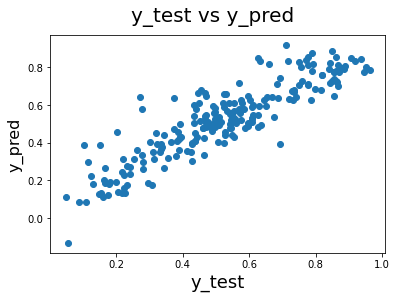

In [77]:
#Evaluation

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

There is linear relationship between test and predicted values

In [78]:
#Finding out R2

from sklearn.metrics import r2_score

r2=r2_score(y_true=y_test ,y_pred=y_pred)
r2

0.7941977535477243

The model is predicting the values correctly

In [79]:
#Adjusted R2

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]


adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7628

In [80]:
from sklearn.metrics import mean_squared_error

RMSE = round((mean_squared_error(y_test, y_pred))**0.5,4)
RMSE

0.0992

In [81]:
from sklearn.metrics import mean_absolute_error

MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0758

The R2 and Adjusted R2 for test set are approximately within plus/minus 5 range of R2 and Adjusted R2 of train values.

The Root Mean Squared Error value for the test dataset based on final model is 
0.0992 and Mean Absolute Error is 0.0758, which indicates that the model is really good.

Top Predictors are:
    
1.Temperature (Temp) : A coefficient value of ‘0.548008’ indicates that a temperature has significant impact on bike rentals.

2.year(yr): A coefficient value of '0.232861' indicates that a year has significant impact on bike rentals as the the deamnd increased in 2019
    
3.Light snow/ rain : A coefficient value of ‘-0.282869’ indicates that light snow/rain decreases the rentals.
    
The comapany should consider the above variables as it was observed that temp and weather condition has good effect on demand 
of these bikes. A good weather and high temperature can increase the bookings.